# <font color='red' size='6'>Inteligência Artificial</font>
### Aprendizado: Análise Exploratória, Seleção de Atributos, Aplicação de Vários Algoritmos de Classificação, Avaliação e Geração de Modelos Preditivos
### Problema: Detecção de Câncer de Mama

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings 
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

# Análise Exploratória: Síntese

In [3]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('df_cancer_mama_preparados.csv', sep = ',', encoding = 'UTF-8')

In [6]:
# Mostra dois registros do arquivo
dfdadosMama.head(2)

,bi_rads,age,shapes,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1


In [8]:
# apresenta os tipas de dados das colunas
dfdadosMama.dtypes

bi_rads     int64
age         int64
shapes      int64
margin      int64
density     int64
severity    int64
dtype: object

In [10]:
# Mostra a frequência abasoluta dos registros por shape
dfdadosMama.groupby('shapes').size()

shapes
1    224
2    211
3     95
4    431
dtype: int64

In [12]:
# Mostra a frequência abasoluta dos registros por density
dfdadosMama.groupby('density').size()

density
1     16
2     59
3    874
4     12
dtype: int64

In [14]:
# Mostra a frequência abasoluta dos registros por severity
dfdadosMama.groupby('margin').size()

margin
1    405
2     24
3    116
4    280
5    136
dtype: int64

<Axes: >

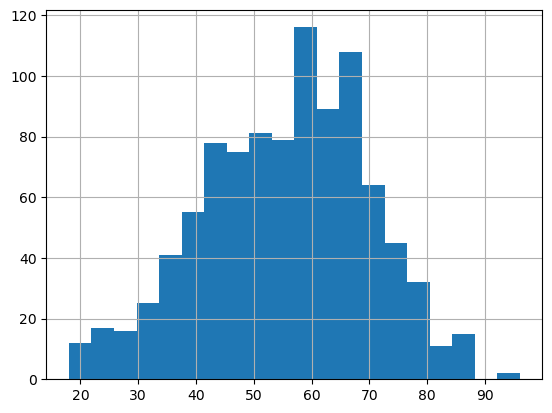

In [16]:
# Apresenta o histograma do atributo idade. Observe a distribuição e os picos.
# Considere bins como sendo o número de barras
dfdadosMama.age.hist(bins=20)

In [17]:
# Mostra a frequência abasoluta dos registros por  severity
dfdadosMama.groupby('severity').size()

severity
0    516
1    445
dtype: int64

In [20]:
# Resumo estatístico do dataset
dfdadosMama.describe()

,bi_rads,age,shapes,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.295525,55.484912,2.762747,2.706556,2.917794,0.463059
std,0.705684,14.442416,1.243276,1.576272,0.365869,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

<Axes: >

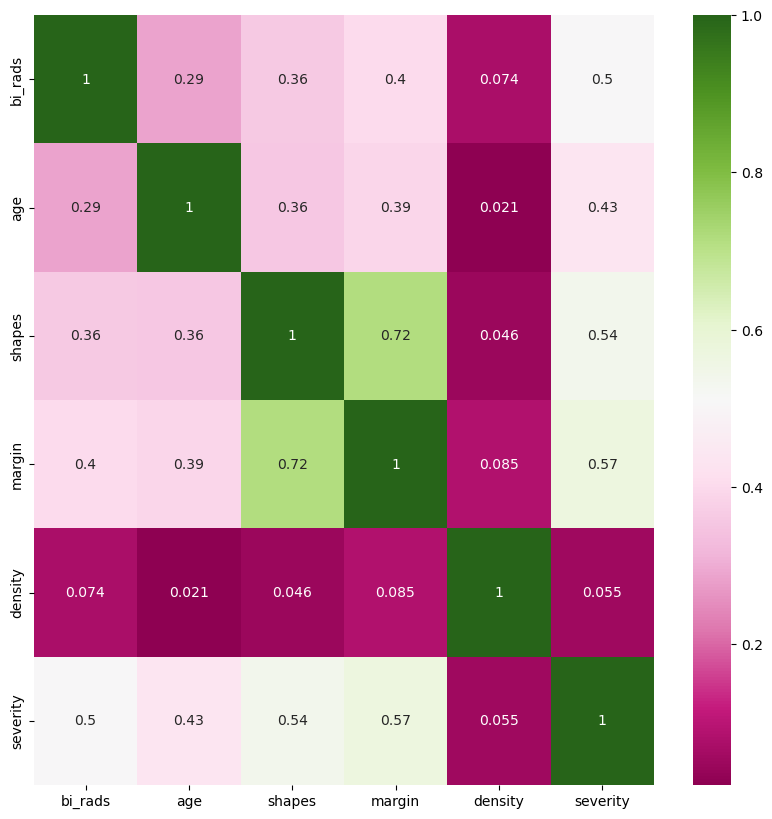

In [23]:
# Cria mapa de calor com a correlação do dataset com o mapa ce cores PiYG
# Aumenta o tamanho da figura a ser exibida
plt.figure(figsize=(10,10))
sns.heatmap(dfdadosMama.corr(), annot=True, cmap = "PiYG")

## Seleção de Atributos (<i>Feature Selection</i>)

Os atributos presentes no seu dataset e que você utiliza nos dados de treino, terão grande influência na precisão e resultado do seu modelo preditivo. 

Atributos irrelevantes terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. 

O Scikit-learn possui funções que automatizam o trabalho de extração e seleção de variáveis (atributos).

A etapa de Seleção de Atributos é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. 

A selação nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

### Seleção Univariada

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html.

Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever. 

O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos, tais como: (Classificação) f_classif, chi2 e mutual_info_classif; (Regressão) f_regression e mutual_info_regression. 

Vamos usar o teste f_classif e selecionar os 3 melhores atributos que podem ser usados como variáveis preditoras.

### Extração de Variáveis com f_classif

In [28]:
# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [29]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('df_cancer_mama_preparados.csv', sep = ',', encoding = 'UTF-8')

In [32]:
# Mostra a frequência abasoluta dos registros por  severity
dfdadosMama.groupby('severity').size()

severity
0    516
1    445
dtype: int64

In [34]:
# Mostra as colunas do dataset
dfdadosMama.columns

Index(['bi_rads', 'age', 'shapes', 'margin', 'density', 'severity'], dtype='object')

In [36]:
# Carregando os dados
array = dfdadosMama.values

In [38]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,1:len(dfdadosMama.columns)-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,len(dfdadosMama.columns)-1] # Atributo alvo: severity (1 - maligno, 0 - benigno

In [40]:
X

array([[67,  3,  5,  3],
       [43,  1,  1,  3],
       [58,  4,  5,  3],
       ...,
       [64,  4,  5,  3],
       [66,  4,  5,  3],
       [62,  3,  3,  3]], dtype=int64)

In [42]:
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [44]:
# Instancia a Função com a aplicação da 
# função de pontuação (score_func) f_regression para seleção dos 5 atributos mais relevantes
best_var = SelectKBest(score_func = f_classif, k = 3)

In [46]:
# Executa a função de pontuação em (X, Y) e obtém os atributos selecionados
fit = best_var.fit(X, Y)

In [48]:
# Reduz X para os recursos selecionados
features = fit.transform(X)

In [50]:
# Resultados obtidos com SelectKBest
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])
print('\nAtributos selecionados: \n\n', features)


Número original de atributos: 4

Número reduzido de atributos: 3

Atributos selecionados: 

 [[67  3  5]
 [43  1  1]
 [58  4  5]
 ...
 [64  4  5]
 [66  4  5]
 [62  3  3]]


In [52]:
X # Os atributos selecinados foram age, shapes e margin, bi-rads não foi considerado em X

array([[67,  3,  5,  3],
       [43,  1,  1,  3],
       [58,  4,  5,  3],
       ...,
       [64,  4,  5,  3],
       [66,  4,  5,  3],
       [62,  3,  3,  3]], dtype=int64)

## Eliminação Recursiva de Atributos

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.
        
Esta é uma técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. 

Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. 

Em inglês esta técnia é chamada <i>Recursive Feature Elimination</i> (RFE).   

O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de DecisionTreeClassifier para selecionar as 3 melhores variáveis preditoras. 

O RFE selecionou as variáveis marcadas como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos".

### Eliminação Recursiva de Variáveis

In [56]:
# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import RFE
# Importando o Algoritmo de Classificação: CART - Árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('df_cancer_mama_preparados.csv', sep = ',', encoding = 'UTF-8')

In [60]:
# Mostra as colunas do dataset
dfdadosMama.columns

Index(['bi_rads', 'age', 'shapes', 'margin', 'density', 'severity'], dtype='object')

In [62]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,1:len(dfdadosMama.columns)-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,len(dfdadosMama.columns)-1] # Atributo alvo: severity (1 - maligno, 0 - benigno

In [64]:
# Instanciando o modelo
modelo = DecisionTreeClassifier()

In [66]:
# Aplicando o RFE 
rfe = RFE(modelo)

In [68]:
fit = rfe.fit(X, Y)

In [70]:
# Cria um Dataframe com os valores de obtidos da seleção
dfResRFE = pd.DataFrame(data={"var_selec":fit.support_, "ranking": fit.ranking_}, index = dfdadosMama.columns[1:5])

In [72]:
# Mostra os resultados como dataframe
dfResRFE

,var_selec,ranking
age,True,1
shapes,False,2
margin,True,1
density,False,3


In [74]:
# Mostra os atributos selecionados
dfResRFE[dfResRFE["var_selec"] == True]

,var_selec,ranking
age,True,1
margin,True,1


## Método Ensemble para Seleção de Variáveis

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
        
Bagged Decision Trees, como o algoritmo RandomForest (são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. 

Esse método retorna um score para cada atributo.

Quanto maior o score, maior a importância do atributo.

### Importância do Atributo com o RandomForestClassifier

In [78]:
# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier

In [80]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('df_cancer_mama_preparados.csv', sep = ',', encoding = 'UTF-8')

In [82]:
# Mostra as colunas do dataset
dfdadosMama.columns

Index(['bi_rads', 'age', 'shapes', 'margin', 'density', 'severity'], dtype='object')

In [84]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,1:len(dfdadosMama.columns)-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,len(dfdadosMama.columns)-1] # Atributo alvo: severity (1 - maligno, 0 - benigno

In [86]:
# Criação do Modelo - Feature Selection
modelo = RandomForestClassifier()
modelo.fit(X, Y)

RandomForestClassifier()

In [88]:
# Monta uma série contendo os nomes dos atributos e a sua importância 
sAtributos = pd.Series(modelo.feature_importances_, index=dfdadosMama.columns[1:5])

In [92]:
# Mostra a importância dos atributos
# Considerando este fato, podemos selecionar os mais relevantes
# Claro que podemos utilizar o nosso conhecimento sobre o assunto
sAtributos.sort_values(ascending=False)[0:5]

age        0.425604
margin     0.331899
shapes     0.206590
density    0.035907
dtype: float64

In [94]:
# Montando o dataset com os atributos preditores selecionados 
# e o atributo alvo 
dfaptos_SPAtribSelec = dfdadosMama[["age", "shapes", "margin", "severity"]];
dfaptos_SPAtribSelec.head(3)

,age,shapes,margin,severity
0,67,3,5,1
1,43,1,1,1
2,58,4,5,1


In [96]:
# Salvando os atributos preparados, sendo eles:
# atributos preditores: age, shpaes e margin
# e o atributo alvo severity
dfaptos_SPAtribSelec.to_csv("dfdadosMama_atrib_selec.csv", index=False)

# Aprendizado Supervisionado: Algoritmos de Classificação

Não há como saber qual algoritmo vai funcionar melhor na construção do modelo, antes de realizar os testes do algoritmo com os dados de testes do </i>dataset</i>. 

O ideal é testar alguns algoritmos e então escolher aquele que fornece melhor nível de precisão. 

Para isso, serão considerados os algoritmos de classificação:

1) <i>K-Nearest Neighbors</i> (KNN)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

2) Árvore de Decisão (CART - <i>Classification and Regression Trees</i>) <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

3) Regressão Logística <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

4) Naïve Bayes<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

5) Máquinas de Vetores de Suporte (SVMs - <i>Support Vector Machines</i>)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

6) Random Forest<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

7) AdaBoost<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html.

Os algoritmos KNN e CART serão utilizados individualmente para o treinamento pelos dados de treino e validação com os dados de teste, posteriormente, todos os sete algoritmos serão utilizados juntos com os mesmos dados de treino e teste.

A métrica de comparação utilizada será acurácia.

### Dados de Treino e de Teste

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. 

Dividimos nossos dados originais em dados de treino e de teste. 

Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. 

A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 80/20 (treino/teste) e 70/30 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. 

O ponto negativo é a possibilidade de alta variância.

## Avaliando a Performance


As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. 

### Métricas para Algoritmos de Classificação

Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html.

# Algoritmos de classificação:

1) <i>K-Nearest Neighbors</i> (KNN)<br />
2) Árvore de Decisão (CART - <i>Classification and Regression Trees</i>) <br />
3) Regressão Logística <br />
4) Naïve Bayes<br />
5) Máquinas de Vetores de Suporte (SVMs - <i>Support Vector Machines</i>)<br />
6) Random Forest<br />
7) AdaBoost

In [103]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando os módulos dos algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [105]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('dfdadosMama_atrib_selec.csv', sep = ',', encoding = 'UTF-8')

In [107]:
# Obtém os dados do câncer de mama
array = dfdadosMama.values

In [109]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:len(dfdadosMama.columns)-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,len(dfdadosMama.columns)-1] # Atributo alvo: severity (1 - maligno, 0 - benigno)

In [111]:
X

array([[67,  3,  5],
       [43,  1,  1],
       [58,  4,  5],
       ...,
       [64,  4,  5],
       [66,  4,  5],
       [62,  3,  3]], dtype=int64)

In [113]:
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [115]:
# Definindo o tamanho das amostras
teste_size = 0.2 # percentual de 20% para teste

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [117]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [119]:
# Preparando a lista de modelos instanciados
modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
modelos.append(('RFor', RandomForestClassifier()))
modelos.append(('AdaB', AdaBoostClassifier()))

In [121]:
# Avaliando cada modelo em um loop
dicAcuracia = {}
dicMatriz = {}
dicRelatorio = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    # Fazendo as previsões e construindo a Matriz de Confusão
    previsoes = modelo.predict(X_teste)
    # Obtendo a matriz de confusão
    matrix = confusion_matrix(Y_teste, previsoes)
    # construindo o relatório de resultados
    report = classification_report(Y_teste, previsoes)
    # Score do modelo nos dados de teste  (Acurácia)
    acuracia = modelo.score(X_teste, Y_teste)
    # Criando dicionários para a acurácia matriz de confusão e relatório
    dicAcuracia[nome] = acuracia*100.0
    dicMatriz[nome] = matrix
    dicRelatorio[nome] = report

In [122]:
# Montando um dataframe com a acurácia obtida de cada modelo
pdAcuraciaModelos = pd.DataFrame(dicAcuracia.items())
pdAcuraciaModelos.columns = ['nome','acuracia']

In [125]:
# Apresenta a acurácia dos modelos ordenados
pdAcuraciaModelos.sort_values(ascending=False, by='acuracia')

,nome,acuracia
3,NB,83.419689
6,AdaB,83.419689
2,LR,82.383420
4,SVM,79.792746
0,KNN,78.756477
5,RFor,73.056995
1,CART,72.538860


In [127]:
# Apresenta a matriz de confusão para o Adaboost
dicMatriz['AdaB']

array([[88, 24],
       [ 8, 73]], dtype=int64)

In [129]:
# Apresenta a matriz de confusão para o Naive Bayes
dicMatriz['NB']

array([[86, 26],
       [ 6, 75]], dtype=int64)

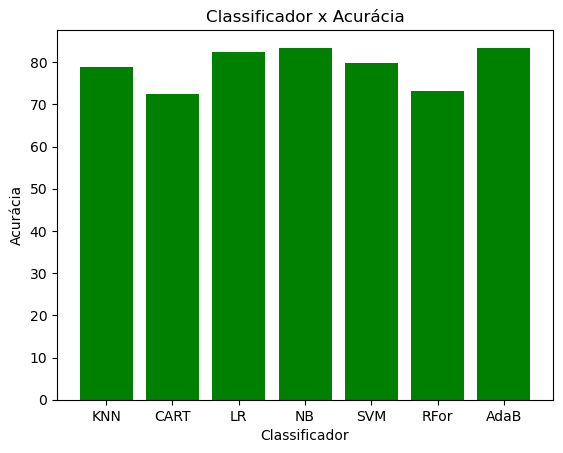

In [131]:
# Gráfico de barras para comparar a acurácia entre os modelos
plt.bar(list(dicAcuracia.keys()), dicAcuracia.values(), color='green')
# legenda do eixo x
plt.xticks(list(dicAcuracia.keys()))
# Label eixo Y
plt.ylabel('Acurácia')
# Label eixo X
plt.xlabel('Classificador')
# Título do gráfico
plt.title('Classificador x Acurácia')
# mostra o gráfico
plt.show()

# Otimização do Modelo - Ajuste de Hyperparâmetros

Todos os algoritmos de Aprendizado de Máquina são parametrizados, o que significa que você pode ajustar a performance do seu modelo preditivo, através do tuning (ajuste fino) dos parâmetros. 

Seu trabalho é encontrar a melhor combinação entre os parâmetros em cada algoritmo de Aprendizado de Máquina. 

Esse processo também é chamado de Otimização Hyperparâmetro. 

O scikit-learn oferece dois métodos para otimização automática dos parâmetros: <i>Grid Search Parameter Tuning</i> e <i>Random Search Parameter Tuning</i>. 

### Grid Search Parameter Tuning

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

Este método realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid. 

Vamos experimentar este método utilizando o algoritmo Random Forest. No exemplo abaixo veremos que o valor 1 para o parâmetro alpha atingiu a melhor performance.

In [135]:
# Import dos módulos
import numpy as np
from sklearn.model_selection import GridSearchCV

# Importando o módulo do algoritmo
from sklearn.ensemble import RandomForestClassifier

In [137]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('dfdadosMama_atrib_selec.csv', sep = ',', encoding = 'UTF-8')

In [139]:
# Obtém os dados
array = dfdadosMama.values

In [141]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:len(dfdadosMama.columns)-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,len(dfdadosMama.columns)-1] # Atributo alvo: severity (1 - maligno, 0 - benigno)

In [143]:
X

array([[67,  3,  5],
       [43,  1,  1],
       [58,  4,  5],
       ...,
       [64,  4,  5],
       [66,  4,  5],
       [62,  3,  3]], dtype=int64)

In [145]:
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [147]:
# Definindo os valores que serão testados para o Random Forest
# ccp_alpha: valor ponto flutuante não negativo, padrão = 0,0. Parâmetro de complexidade usado para 
# remoção de custo-complexidade mínima.  A subárvore com a maior complexidade de custo menor do que ccp_alpha será escolhida.
# Por padrão, nenhuma poda é executada. 
# max_depth: valor inteiro, default = None. A profundidade máxima da árvore. 
# Se nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham 
# menos do que min_samples_split amostras.
#
valores_grid = {'n_estimators': np.array(list(range(10,20))), 'ccp_alpha': np.array([0.0, 0.5, 1.0]), 'max_depth': np.array([ 5, 6, 7, 8, 9]), 'random_state': np.array([ 5, 6, 7, 8, 9]) }
seed = 7

In [149]:
# Instanciando o modelo
modelo = RandomForestClassifier()

In [151]:
# Instanciando o GridSearchCV e fazendo o fit para encontrar os melhores valores para os parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([0. , 0.5, 1. ]),
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': array([5, 6, 7, 8, 9])})

In [155]:
#### Print do resultado
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Melhores Parâmetros do Modelo:
 RandomForestClassifier(max_depth=5, n_estimators=17, random_state=7)


In [157]:
# Definindo o tamanho das amostras
teste_size = 0.2  # percentual de 20% para teste

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [159]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [161]:
# Criando o objeto que vai obter o modelo 
modelo = RandomForestClassifier(max_depth=5, n_estimators=17, random_state=7)

In [163]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Matriz de Confusão
previsoes = modelo.predict(X_teste)

In [165]:
# Obtendo a matriz de confusão
matrix = confusion_matrix(Y_teste, previsoes)

# construindo o relatório de resultados
report = classification_report(Y_teste, previsoes)

# Score do modelo nos dados de teste  (Acurácia)
result = modelo.score(X_teste, Y_teste)

In [167]:
# Imprime os resultados
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

# Imprimindo a Matriz de Confusão
print(matrix)

# Imprimindo o relatório
print(report)

Acurácia nos Dados de Teste: 80.829%
[[87 25]
 [12 69]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       112
           1       0.73      0.85      0.79        81

    accuracy                           0.81       193
   macro avg       0.81      0.81      0.81       193
weighted avg       0.82      0.81      0.81       193



# Random Search Parameter Tuning

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html.

Este método gera amostras dos parâmetros dos algoritmos a partir de uma distribuição randômica uniforme para um número fixo de interações. 

Um modelo é construído e testado para cada combinação de parâmetros.

In [170]:
# Import dos módulos
import numpy as np

# Uma variável aleatória contínua uniforme.
# No formulário padrão, a distribuição é uniforme em [0, 1]. 
# Usando os parâmetros loc e scale, obtém-se a distribuição uniforme em [loc, loc + scale].
from scipy.stats import uniform

from sklearn.model_selection import RandomizedSearchCV
# Importando o módulo do algoritmo
from sklearn.ensemble import RandomForestClassifier

In [172]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
# Considerando as classes balanceadas pela técnica SMOTE
dfdadosMama = pd.read_csv('dfdadosMama_atrib_selec.csv', sep = ',', encoding = 'UTF-8')

In [174]:
# Obtém os dados
array = dfdadosMama.values

# Separando o array em componentes de input e output
X = array[:,0:len(dfdadosMama.columns)-1]
Y = array[:,len(dfdadosMama.columns)-1]

In [176]:
X

array([[67,  3,  5],
       [43,  1,  1],
       [58,  4,  5],
       ...,
       [64,  4,  5],
       [66,  4,  5],
       [62,  3,  3]], dtype=int64)

In [178]:
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [180]:
# Definindo os valores que serão testados
# ccp_alpha: valor ponto flutuante não negativo, padrão = 0,0. Parâmetro de complexidade usado para 
# remoção de custo-complexidade mínima.  A subárvore com a maior complexidade de custo menor do que ccp_alpha será escolhida.
# Por padrão, nenhuma poda é executada. 
# max_depth: valor inteiro, default = None. A profundidade máxima da árvore. 
# Se nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham 
# menos do que min_samples_split amostras.
#
valores_grid = {'n_estimators': list(range(10,30)), 'ccp_alpha': [0.0, 0.25, 0.5, 0.75, 0.9, 1.0], 'max_depth': [ 5, 6, 7, 8, 9], 'random_state': [ 5, 6, 7, 8, 9] }
seed = 7

In [182]:
# Criando o modelo
modelo = RandomForestClassifier()

In [184]:
# Instancia o método para procura dos melhores hiperparâmetros
# com 100 iterações
iterations = 500
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)

In [186]:
# Faz o fit para encontrar os melhores valores para os parâmetros
rsearch.fit(X, Y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=500,
                   param_distributions={'ccp_alpha': [0.0, 0.25, 0.5, 0.75, 0.9,
                                                      1.0],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29],
                                        'random_state': [5, 6, 7, 8, 9]},
                   random_state=7)

In [188]:
# Print do resultado
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Melhores Parâmetros do Modelo:
 RandomForestClassifier(max_depth=5, n_estimators=27, random_state=7)


In [190]:
# Definindo o tamanho das amostras
teste_size = 0.2 # percentual de 20% para teste

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [192]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [194]:
# Criando o objeto que vai obter o modelo 
modelo = RandomForestClassifier(max_depth=5, n_estimators=27, random_state=7)

In [196]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

RandomForestClassifier(max_depth=5, n_estimators=27, random_state=7)

In [198]:
# Fazendo as previsões e construindo a Matriz de Confusão
previsoes = modelo.predict(X_teste)

In [200]:
# Obtendo a matriz de confusão
matrix = confusion_matrix(Y_teste, previsoes)

# construindo o relatório de resultados
report = classification_report(Y_teste, previsoes)

# Score do modelo nos dados de teste  (Acurácia)
result = modelo.score(X_teste, Y_teste)

In [202]:
# Imprime os resultados
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

# Imprimindo a Matriz de Confusão
print(matrix)

# Imprimindo o relatório
print(report)

Acurácia nos Dados de Teste: 81.347%
[[86 26]
 [10 71]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       112
           1       0.73      0.88      0.80        81

    accuracy                           0.81       193
   macro avg       0.81      0.82      0.81       193
weighted avg       0.83      0.81      0.81       193



# Salvando o modelo

O modelo será obtido pelo melhor algoritmo e os melhores valores para os seus hiperparâmetros obtidos na etapa anterior.

In [205]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando o módulo do algoritmo
from sklearn.ensemble import RandomForestClassifier

# Importando o pacote utilizado para salvar o modelo como arquivo binário
import joblib

In [207]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# from http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# Com base nos dados obtidos de (1), o problema de negócio é: 
# prever se um nódulo da mama é  benigno ou maligno
# 1. M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007). 
# The prediction of breast cancer biopsy outcomes using two CAD approaches 
# that both emphasize an intelligible decision process. Medical Physics 34(11), pp. 4164-4172.
dfdadosMama = pd.read_csv('dfdadosMama_atrib_selec.csv', sep = ',', encoding = 'UTF-8')

In [209]:
# Carregando os dados
array = dfdadosMama.values

In [211]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:len(dfdadosMama.columns)-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,len(dfdadosMama.columns)-1] # Atributo alvo: severity (1 - maligno, 0 - benigno)

In [213]:
X

array([[67,  3,  5],
       [43,  1,  1],
       [58,  4,  5],
       ...,
       [64,  4,  5],
       [66,  4,  5],
       [62,  3,  3]], dtype=int64)

In [215]:
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [217]:
# Definindo o tamanho das amostras
teste_size = 0.2 # percentual de 20% para teste

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [219]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [221]:
# Criando o objeto que vai obter o modelo 
#  Fazendo uso dos melhores valores dos parâmetros obtidos com o RandomizeSearchCV
modelo = RandomForestClassifier(max_depth=5, n_estimators=27, random_state=7)

In [223]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

RandomForestClassifier(max_depth=5, n_estimators=27, random_state=7)

In [225]:
# Salvando o modelo 
arquivo = 'modelo_rf_class_cancermama.sav'
joblib.dump(modelo, arquivo)
print("Modelo salvo!")

Modelo salvo!


In [227]:
# Carregando o arquivo
modelo_class_final = joblib.load(arquivo)
print("Modelo carregado!")

Modelo carregado!


In [229]:
# Fazendo previsões
Y_pred = modelo_class_final.predict(X_teste)

In [231]:
# Obtendo a matriz de confusão
matrix = confusion_matrix(Y_teste, Y_pred); matrix

array([[86, 26],
       [10, 71]], dtype=int64)

In [233]:
# Score do modelo nos dados de teste  (Acurácia)
result = modelo_class_final.score(X_teste, Y_teste)

In [235]:
# Imprime os resultados
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 81.347%


### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue" size = '2'>https://orcid.org/0000-0002-6020-7535.</font><br><font size = '2'> e-mail: ivan.oliveira@mackenzie.br</font>